## 02.2 벡터와 행렬의 연산
- https://datascienceschool.net/view-notebook/3f44cfdda2874080a9aa6b034c71d5ec/

- 선형대수는 Data를 명확하고 간결하게 커뮤니케이션하기 위한 방법론으로서, Data를 표기하고 연산하는 방법에 대한 규칙에 대해 배우는 것이다.
- 지금까지 배운 scala, vector, matrix, tensor 등의 개념은 data를 어떻게 표기, 표현할지에 대한 기본적인 개념을 배운 것, 즉 "숫자"에 대한 개념을 배운것이라고 볼 수 있다.
- 이제는 숫자를 이해한 뒤 사칙 연산 등에 대해 배우는 것처럼, 이제는 Data를 어떻게 연산, 조작, 계산, 처리 하는지 등의 방법을 배울 차례다.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from IPython.display import Image

## 덧셈 / 뺄셈
- element-wise 연산
- 동일한 size의 vector, matrix 간에만 가능

## 곱셈

### 01. scala * vector/matrix
**Broadcasting**
- 일종의 축약식
- vector와 scala 간의 덧셈/뺄셈을 가능하게 하도록 관례적으로 1-vector를 사용하여 scala값을 동일한 사이즈의 vector로 변환하는 연산
- machine learning이나 회귀분석에서 원래의 Data vector x에서 각 원소의 평균값을 뺀 평균제거(mean-removed) vector, or 0-평균(zero-mean) vector를 사용하여 scaling을 하는 경우가 많음.

**Linear Compination**
- "scalar * vector/matrix" 의 합 형태로 이루어진 수식의 형태를 선형조합이라고 한다.

\begin{align}
\begin{matrix}
c_1\,\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ x_1 \\ \phantom{\LARGE\mathstrut} \end{matrix}} & + &
c_2\,\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ x_2 \\ \phantom{\LARGE\mathstrut} \end{matrix}} & + & 
\cdots \!\!\!\!& + & 
c_L\,\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ x_L \\ \phantom{\LARGE\mathstrut} \end{matrix}}
\end{matrix}
\tag{2.2.15}
\end{align}

\begin{align}
\begin{matrix}
c_1\,\boxed{\begin{matrix} \phantom{} & \phantom{} & \phantom{} \\ & A_1 & \\ \phantom{} & \phantom{} & \phantom{} \end{matrix}} 
& + &
c_2\,\boxed{\begin{matrix} \phantom{} & \phantom{} & \phantom{} \\ & A_2 & \\ \phantom{} & \phantom{} & \phantom{} \end{matrix}} 
& + &
\cdots
& + &
c_L\,\boxed{\begin{matrix} \phantom{} & \phantom{} & \phantom{} \\ & A_L & \\ \phantom{} & \phantom{} & \phantom{} \end{matrix}} 
\end{matrix}
\tag{2.2.16}
\end{align}

### 02.1 vector * vector

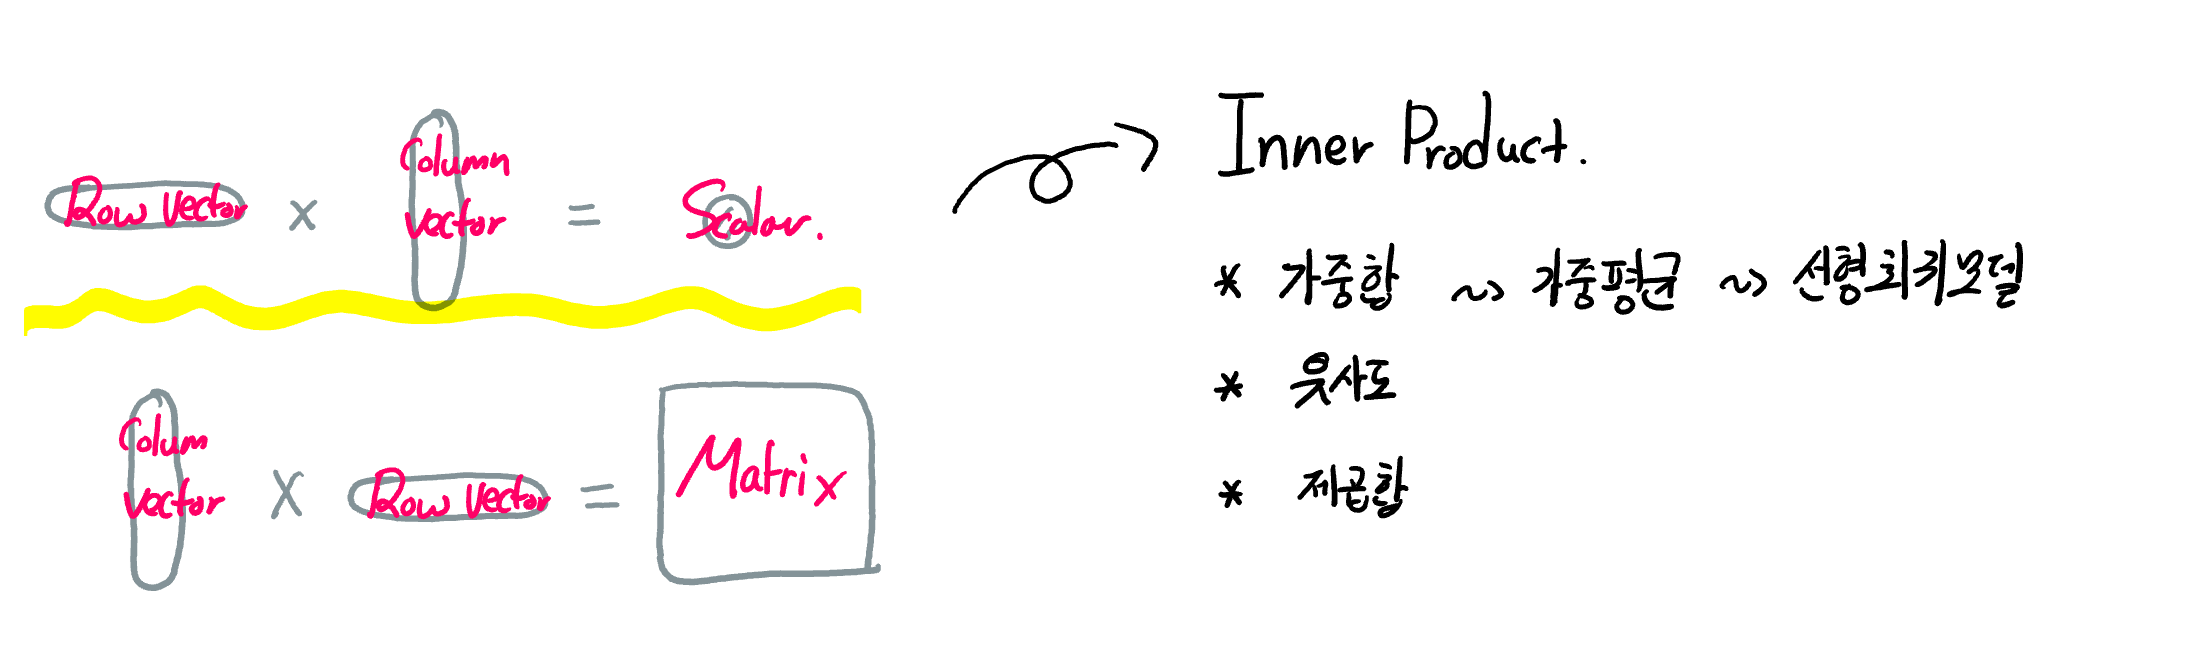

In [2]:
Image(filename='./images/1.png')

**내적 (inner product)**
- 벡터 간의 곱셈을 나타내는 경우는 여러가지가 있지만 여기서는 내적의 형태만 다루기로 한다.

\begin{align}
x^T y 
\tag{2.2.17}
\end{align}

- 내적은 점(dot)으로 표기하는 경우도 있어 dot product라고 부르기도 한다. `(2.2.18)`

\begin{align}
x \cdot y = \, < x, y > \, = x^T y 
\tag{2.2.18}
\end{align}

- 내적을 하려면 두 vector의 차원(길이)가 같아야 한다.


- 항상 앞의 vector가 행 벡터(row vector, 일번 vector의 traspose 상태)여야 하고, 뒤의 vector가 열 벡터(column vector, 일반적 vector) 상태여야 한다. (한글의 "ㅓ" 형태)


- inner product, dot product의 결과는 scala 값이다. ("scala 값으로 reduce 된다.")




- numpy로 coding 할 때에는, 다음과 같이 표현한다.
    - $x$.T @ $y$
    - np.dot($x$.T, $y$)

- numpy로 코딩 시, 2차원 배열로 표시한 vector를 내적했을 때의 결과값은 scala값이 아닌, 2차원 배열 값이다.

In [3]:

x = np.array([[1], [2], [3]]) # 2차원 array
y = np.array([[4], [5], [6]]) # 2차원 array

x.T @ y  # 또는 np.dot(x.T, y) # 결과값은 2차원 array

array([[32]])

- numpy로 코딩 시, 1차원 배열끼리도 내적을 계산한다. 이때 앞의 vector를 row vector, 뒤의 vector를 column vector 라고 가정하고 계산한다.

In [4]:
x = np.array([1, 2, 3]) # 1차원 array(관례적 표현) / 1차원 배열은 transapose 개념이 없다.
y = np.array([4, 5, 6]) # 1차원 array(관례적 표현)

x @ y  # 또는 np.dot(x, y) / 앞의 vector를 transapose 했다고 가정하고 계산한다. / 결과값은 scala

32

- *덧셈과 뺄셈은 연산 전후의 Data의 크기가 동일하기 때문에 직관적으로 이해할 수 있다.*
- *그런데 곱셈의 결과는 왜 갑자기 scala값으로 바뀌지? 왜 이렇게 정의했지?*
- *그것은 데이터 분석 시, 이러한 작업들이 필요하기 때문(가중합, 가중평균, 유사도, 선형회귀모형 등)*


**[Case 1] 가중합**
- weighted sum

\begin{align}
w_1 x_1 + \cdots + w_N x_N = \sum_{i=1}^N w_i x_i 
\tag{2.2.25}
\end{align}

\begin{align}
\begin{aligned}
\sum_{i=1}^N w_i x_i 
&= 
\begin{bmatrix}
w_{1} && w_{2} && \cdots && w_{N}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_N
\end{bmatrix} 
&= w^Tx  
\\
&=
\begin{bmatrix}
x_{1} && x_{2} && \cdots && x_{N}
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_N
\end{bmatrix}
&= x^Tw  
\end{aligned}
\tag{2.2.26}
\end{align}

- 가중치 벡터(weight vector)가 1-vector 라면, (모든 원소가 1이라면) $w.T@x$ 는 단순합을 계산한다. 

\begin{align}
w_1 = w_2 = \cdots = w_N = 1 
\tag{2.2.27}
\end{align}

\begin{align}
w = \mathbf{1}_N 
\tag{2.2.28}
\end{align}

\begin{align}
\sum_{i=1}^N x_i = \mathbf{1}_N^T x 
\tag{2.2.29}
\end{align}

**[Case 2] 가중평균**
- weighted average
- weighted sum을 weighted venter의 합으로 나눈 값


$$\frac{\sum_{i=1}^N w_ix_i}{\sum_{i=1}^N w_i}$$


- 가중치 벡터(weighted vecotr)가 1-vector라면, (모든 원소가 1이라면) 가중평균의 결과값은 단순 평균값을 계산한다.
    - x vector의 평균값은 $\bar{x}$라고 표현한다. *("엑스 바")*

**[Case 3] 유사도**
- vector들 간의 닮은 정도를 표시하는 방법
- 정확히는 코사인 유사도의 개념에서 내적을 활용한다.
- Cos. Silmilarity: 행렬 간의 내적값이 높으면 닮고, 낮으면 덜 닮았음을 의미한다.
    - $1*1=1$ 이지만 서로 다른 값($1*0=0$,  $0*1=0$)인 원리를 이용 

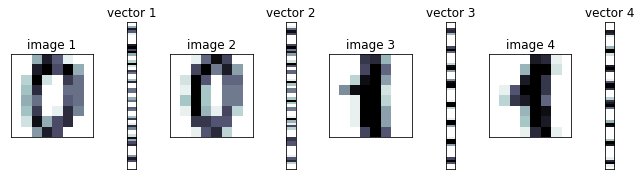

In [5]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [6]:
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0] #유사도 높은 이미지

(3064.0, 3661.0)

In [7]:
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0] #유사도 낮은 이미지

(1866.0, 1883.0, 2421.0, 2479.0)

**[Case 4] 선형회귀모델**
- vector간 inner product를 사용하는 케이스들 중 가장 중요한 케이스들

- Linear Regression Model

\begin{align}
\hat{y} = w_1 x_1 + \cdots + w_N x_N
\tag{2.2.33}
\end{align}

\begin{align}
\hat{y} = w^Tx
\tag{2.2.34}
\end{align}

- 우리가 하고 싶은 것은 어떤 input을 넣었을 때 어떤 output이 나오는지에 대한 관계를 나타내는 function을 알아내는 것 (모델링 하는 것)
    - $x$: 변수 vector, feature vector, 모델에 투입할 input 값
    - $\hat{y}$: 우리가 알아내고자 하는 output 값. 100% 정확한 값은 아니고 예측치이자 추정치.
    - $w$: 가중치, weight vector > 결국 이것을 알아내는 것이 input과 output 간의 관계를 알아내는 것이자, 함수를 정의해내는 것이자, 모델링을 해내는 것이다.
        - 선형회귀 모델은 가중치 벡터로 표현해낼 수 있다.

- Deep learning 중 artificial neural network 방법론에서는 위 선형모델을 다음과 같이 나타낸다.
    - x: node, neuron
    - line: product
    - arrow: sum
    - w: weighted value

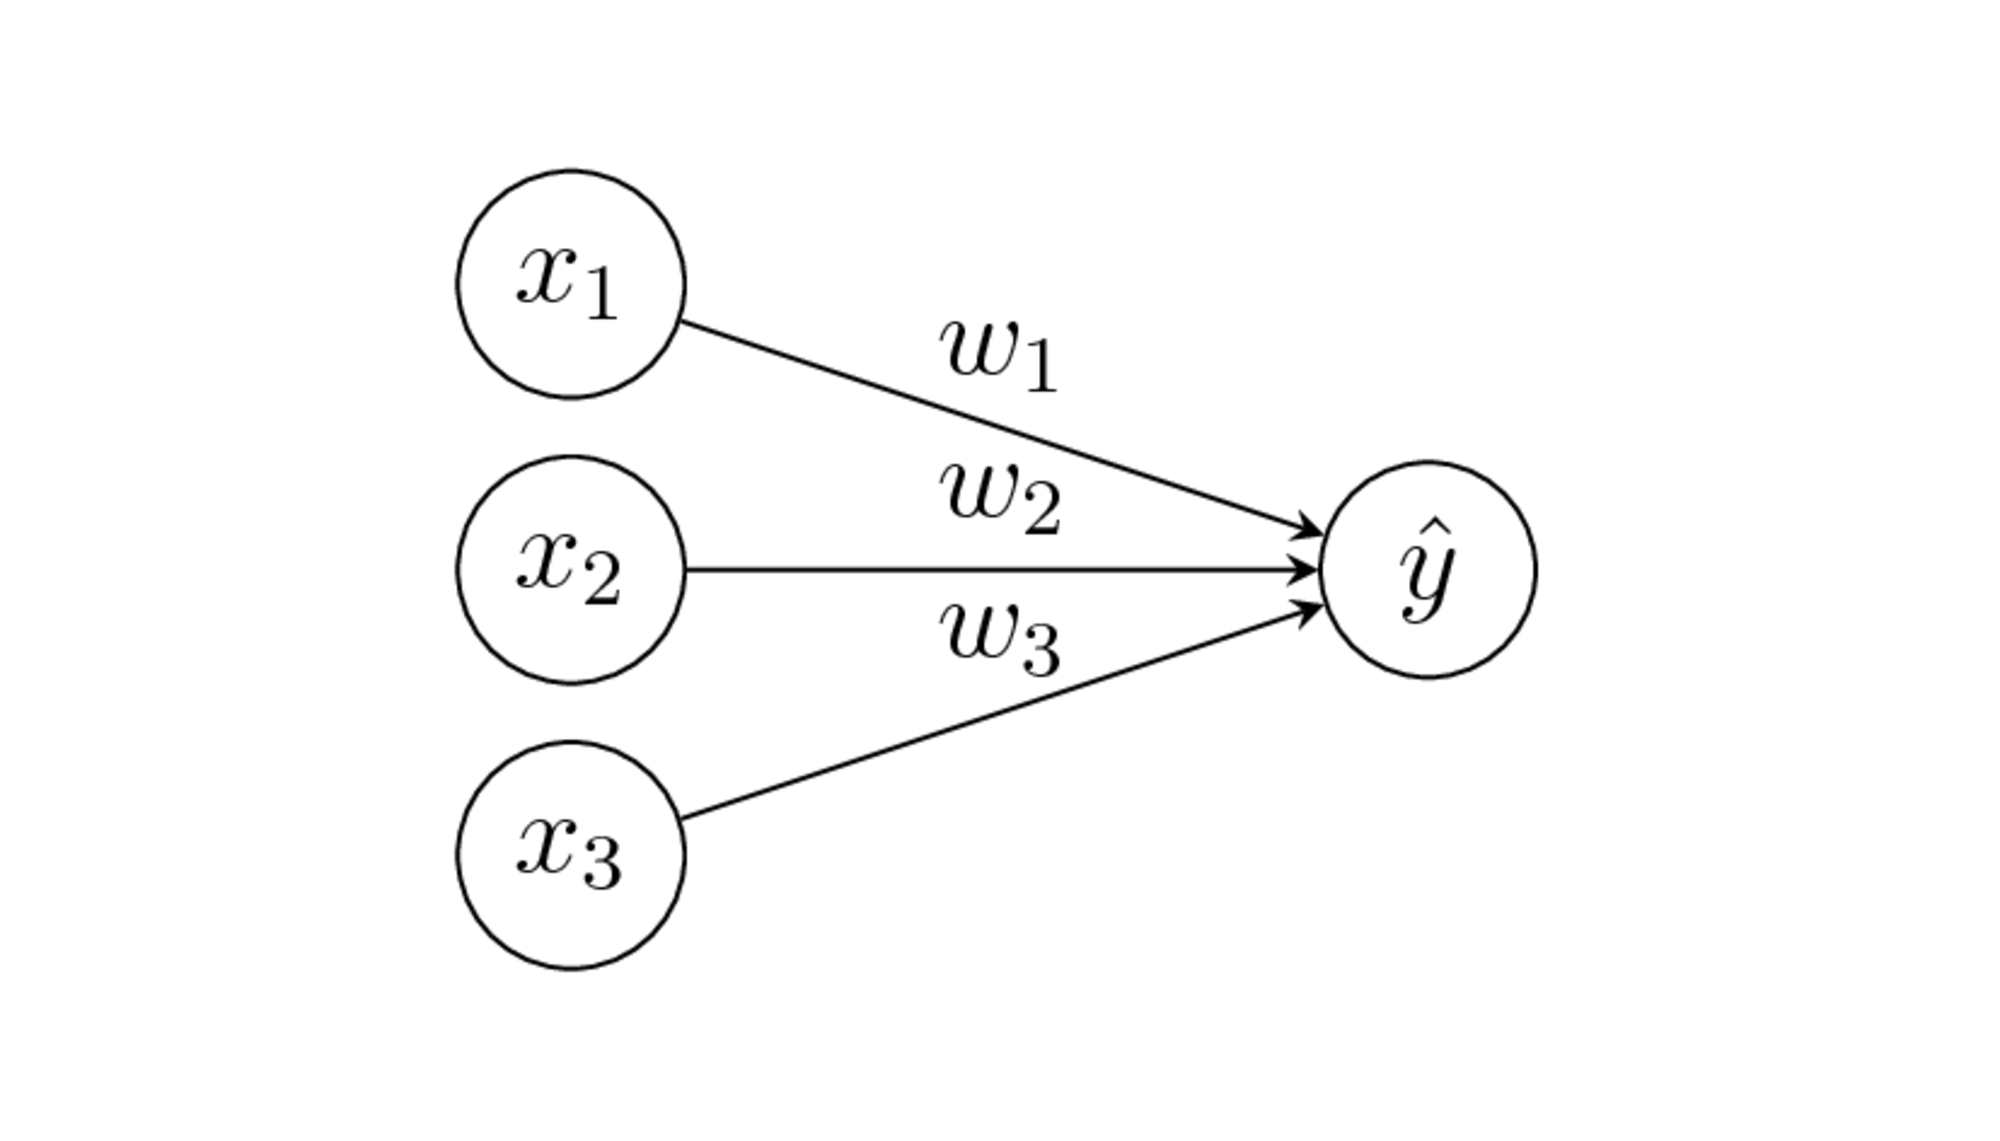

In [8]:
Image(filename='./images/neural_vector.png')

- 선형회귀모델의 단점
    - 현실세계의 대부분 문제는 비 선형적
    - 현실세계의 데이터와 선형회귀모델의 괴리를 줄이기 위해서는 선형회귀모델이 아닌 전혀 다른 모델을 쓰기보다는 선형회귀모델을 기반으로 여러가지 변형과 적용을 거친 수정 선형회귀모델을 사용하는 것이 일반적이다.

**[Case 5] 제곱합**
- Data의 분산이나 표준편차를 구하는 경우, 본인 자신과의 내적을 통해 제곱합을 구한다. (sum of square)


\begin{align}
x^T x = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} = \sum_{i=1}^{N} x_i^2
\tag{2.2.38}
\end{align}

### 02.2  matrix * matrix

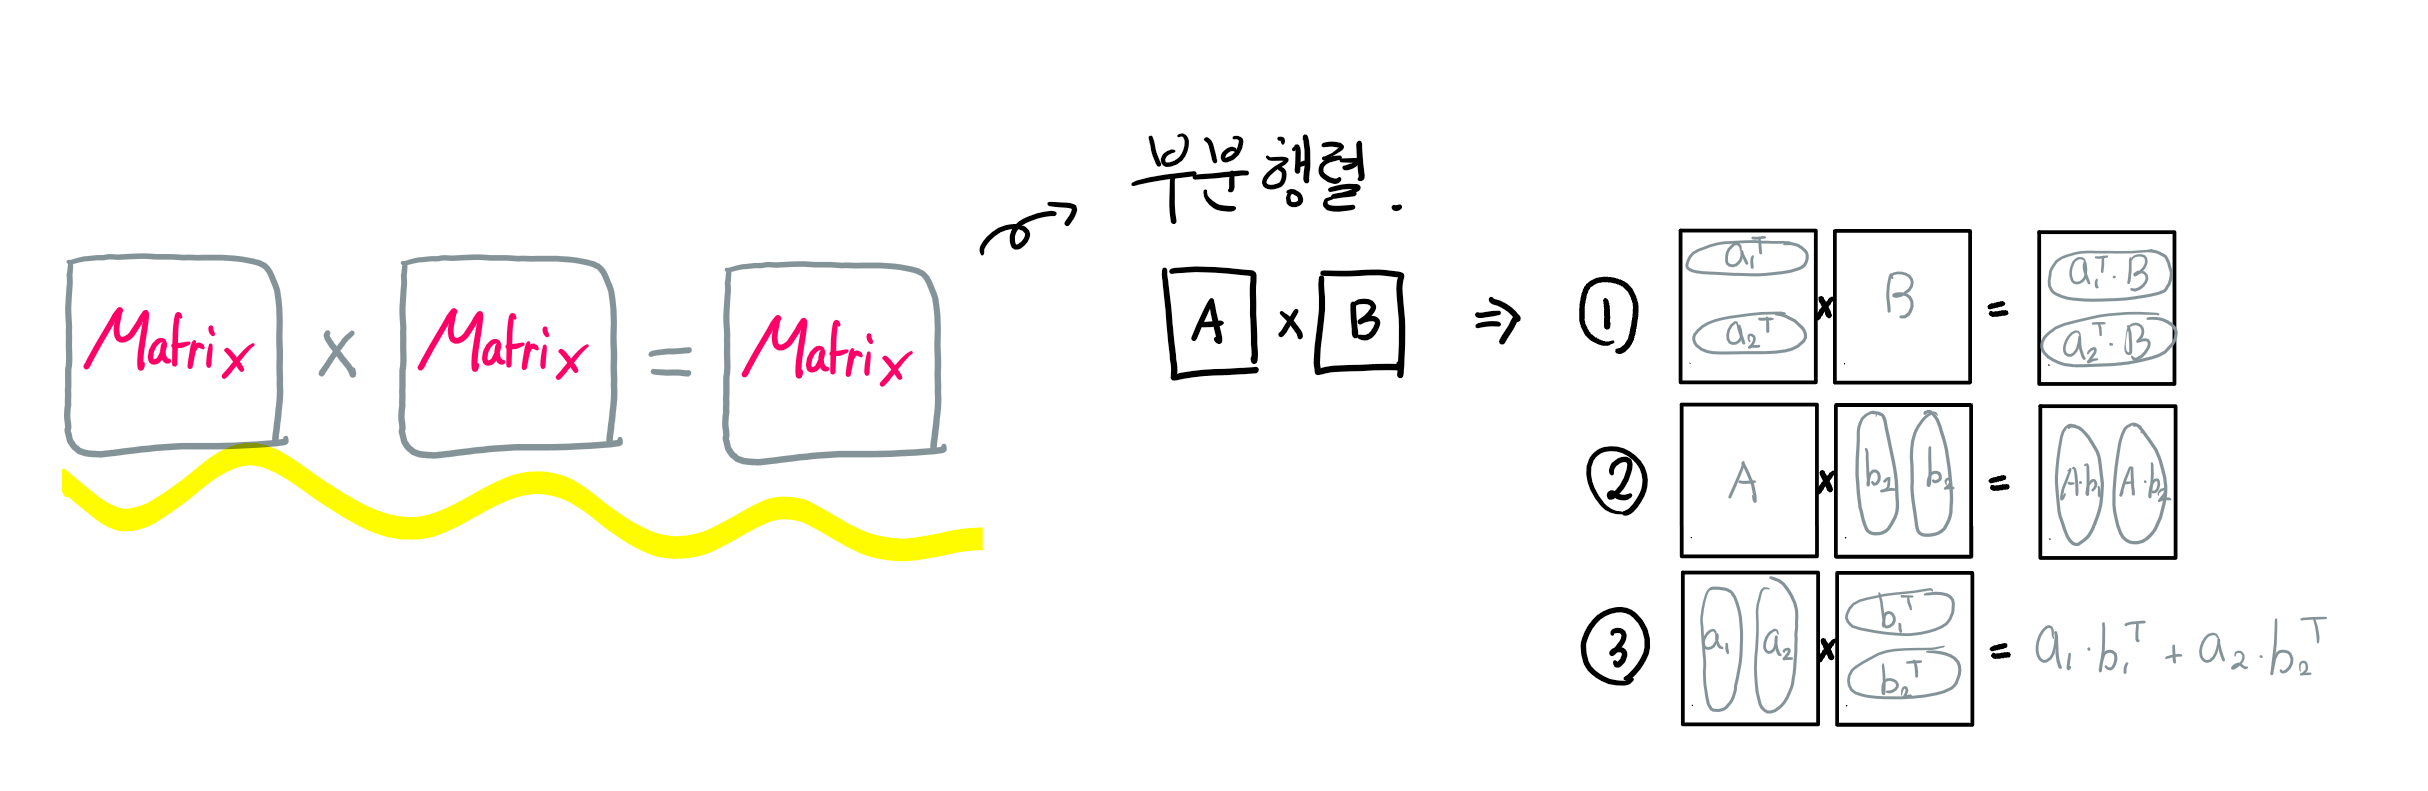

In [9]:
Image(filename='./images/2.png')

기본원리
- 행렬과 행렬의 곱은 기본적으로 각 행렬을 구성하는 vector들의 inner product를 반복하는 것과 동일한 원리이다.

Matrix 간 곱셈의 특징
\begin{align}
A \in \mathbf{R}^{N \times L} , \; B \in \mathbf{R}^{L \times M} \;  \rightarrow \; AB \in \mathbf{R}^{N \times M} 
\tag{2.2.40}
\end{align}


1. 앞 행렬의 columns size와 뒷 행렬의 row size가 동일해야 한다. `A의 L, B의 L이 같다.`
2. 행렬의 곱의 결과는 행렬이며 그 사이즈는 앞 행렬의 row size와 뒷 행렬의 column size로 결정된다. `A의 M, B의 N 이 결과 Matrix의 Size`
3. 교환법칙이 성립하지 않는다. `B@A 는 불가능하거나, 그 결과가 전혀다르다.` 
4. 덧셈과 뺄셈에 대한 곱셈연산의 분배법칙은 성립한다.
5. 전치연산(Transpose)도 덧셈과 뺄셈에 대해 분배법칙이 성립한다.
6. 곱셈에 대한 Transpose는 곱하는 순서가 거꾸로 되면서 분배된다. `(A@B).T = B.T@A.T`
7. "연속"된 행렬의 곱셈은 연산순서를 임의로 해도 결과는 같다. (단 순서가 아닌 위치를 바꾸면 안된다)
8. 어떠한 행렬 X와 항등행렬(identity)의 곱은 항상 어떠한 행렬 X가 된다.
9. 항등행렬의 곱은 교환법칙이 성립한다.`X@I = I@X = X`


numpy 활용
- vector 간의 곱을 구하는것과 마찬가지로 matrix 간의 곱을 구하는 연산도 `@` 또는 `np.dot()` 을 사용한다.

In [10]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = A @ B
C

array([[22, 28],
       [49, 64]])

Aritificial Neural Network (인공신경망)에서의 활용
- 인공신경망 모델에서는 하나의 선형회귀모델만을 활용하는 것이 아니라 여러개의 선형회귀 모델을 사용한다. 
- 이럴 때에는 모델의 가중치가 matrix형태로 나타나 다음과 같이 구현된다. 

\begin{align}
\begin{bmatrix}
\hat{y}_{1} \\
\hat{y}_{2} \\
\end{bmatrix}
=
\begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\    
\end{bmatrix}
\tag{2.2.51}
\end{align}


\begin{align}
\hat{y} = Wx 
\tag{2.2.52}
\end{align}

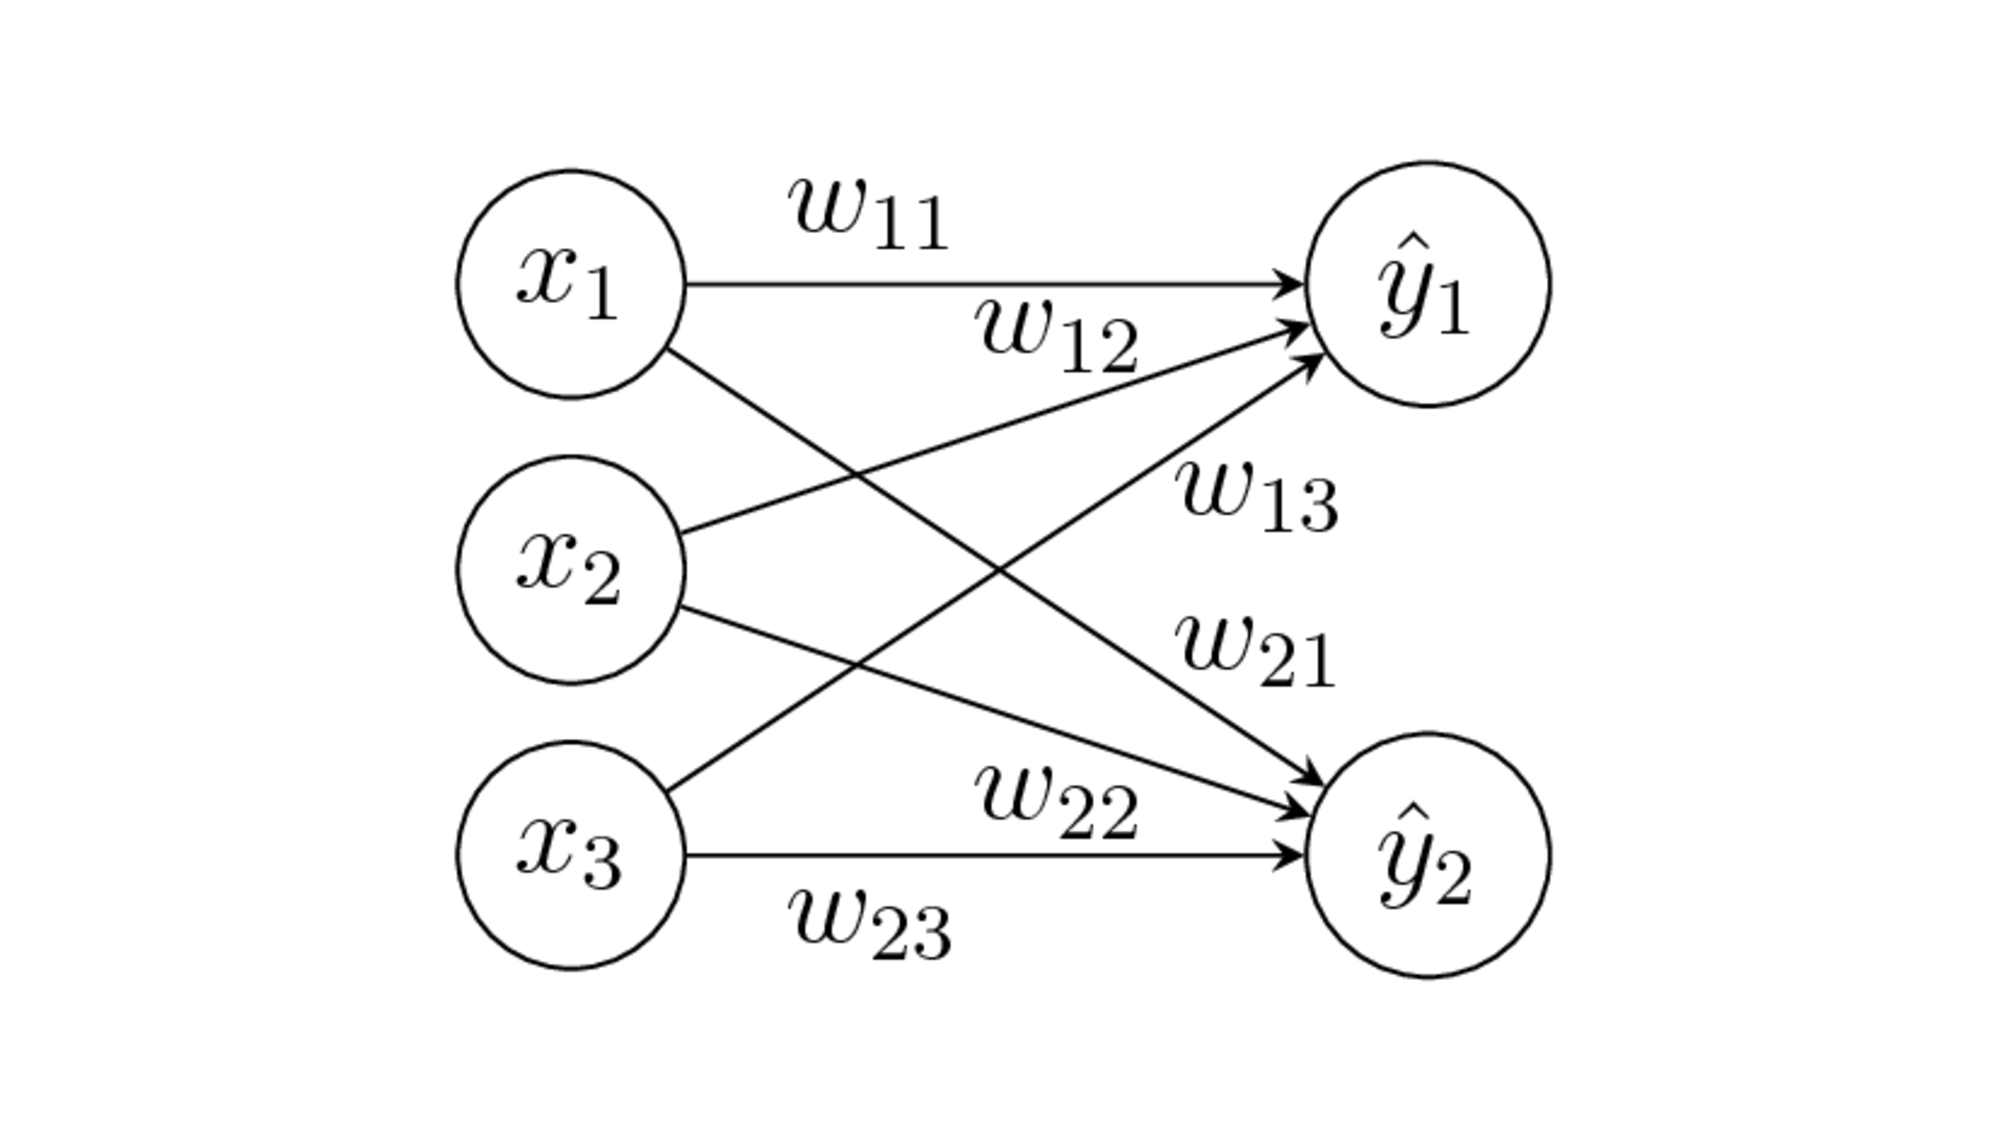

In [11]:
Image(filename='./images/neural_matrix.png')

부분행렬(submatrix)
- "행렬과 행렬의 곱" 의 결과를 어떻게 뜯어볼 수 있을까에 대한 3가지 관점


\begin{align}
AB 
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & a_1^T & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & a_2^T & \phantom{} \end{matrix}} \\ 
\end{bmatrix}
B
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & a_1^TB & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & a_2^TB & \phantom{} \end{matrix}} \\ 
\end{bmatrix} 
\tag{2.2.93}
\end{align}


\begin{align}
AB 
=
A
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\mathstrut} \\ b_1 \\ \phantom{\mathstrut} \end{matrix}} \!\!\!\! & 
\boxed{\begin{matrix} \phantom{\mathstrut} \\ b_2 \\ \phantom{\mathstrut} \end{matrix}}
\end{bmatrix}
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\mathstrut} \\ Ab_1 \\ \phantom{\mathstrut} \end{matrix}} \!\!\!\! &
\boxed{\begin{matrix} \phantom{\mathstrut} \\ Ab_2 \\ \phantom{\mathstrut} \end{matrix}}
\end{bmatrix}
\tag{2.2.96}
\end{align}


\begin{align}
AB 
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\mathstrut} \\ a_1 \\ \phantom{\mathstrut} \end{matrix}}  \!\!\!\!& 
\boxed{\begin{matrix} \phantom{\mathstrut} \\ a_2 \\ \phantom{\mathstrut} \end{matrix}}  \!
\end{bmatrix}
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & b_1^T & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & b_2^T & \phantom{} \end{matrix}} \\ 
\end{bmatrix}
=
\boxed{\begin{matrix} \phantom{\mathstrut} \\ a_1 \\ \phantom{\mathstrut} \end{matrix}} 
\boxed{\begin{matrix} \phantom{} & b_1^T & \phantom{} \end{matrix}} 
+
\boxed{\begin{matrix} \phantom{\mathstrut} \\ b_1 \\ \phantom{\mathstrut} \end{matrix}} 
\boxed{\begin{matrix} \phantom{} & b_2^T & \phantom{} \end{matrix}} 
\tag{2.2.98}
\end{align}

### 02.3 matrix * vector

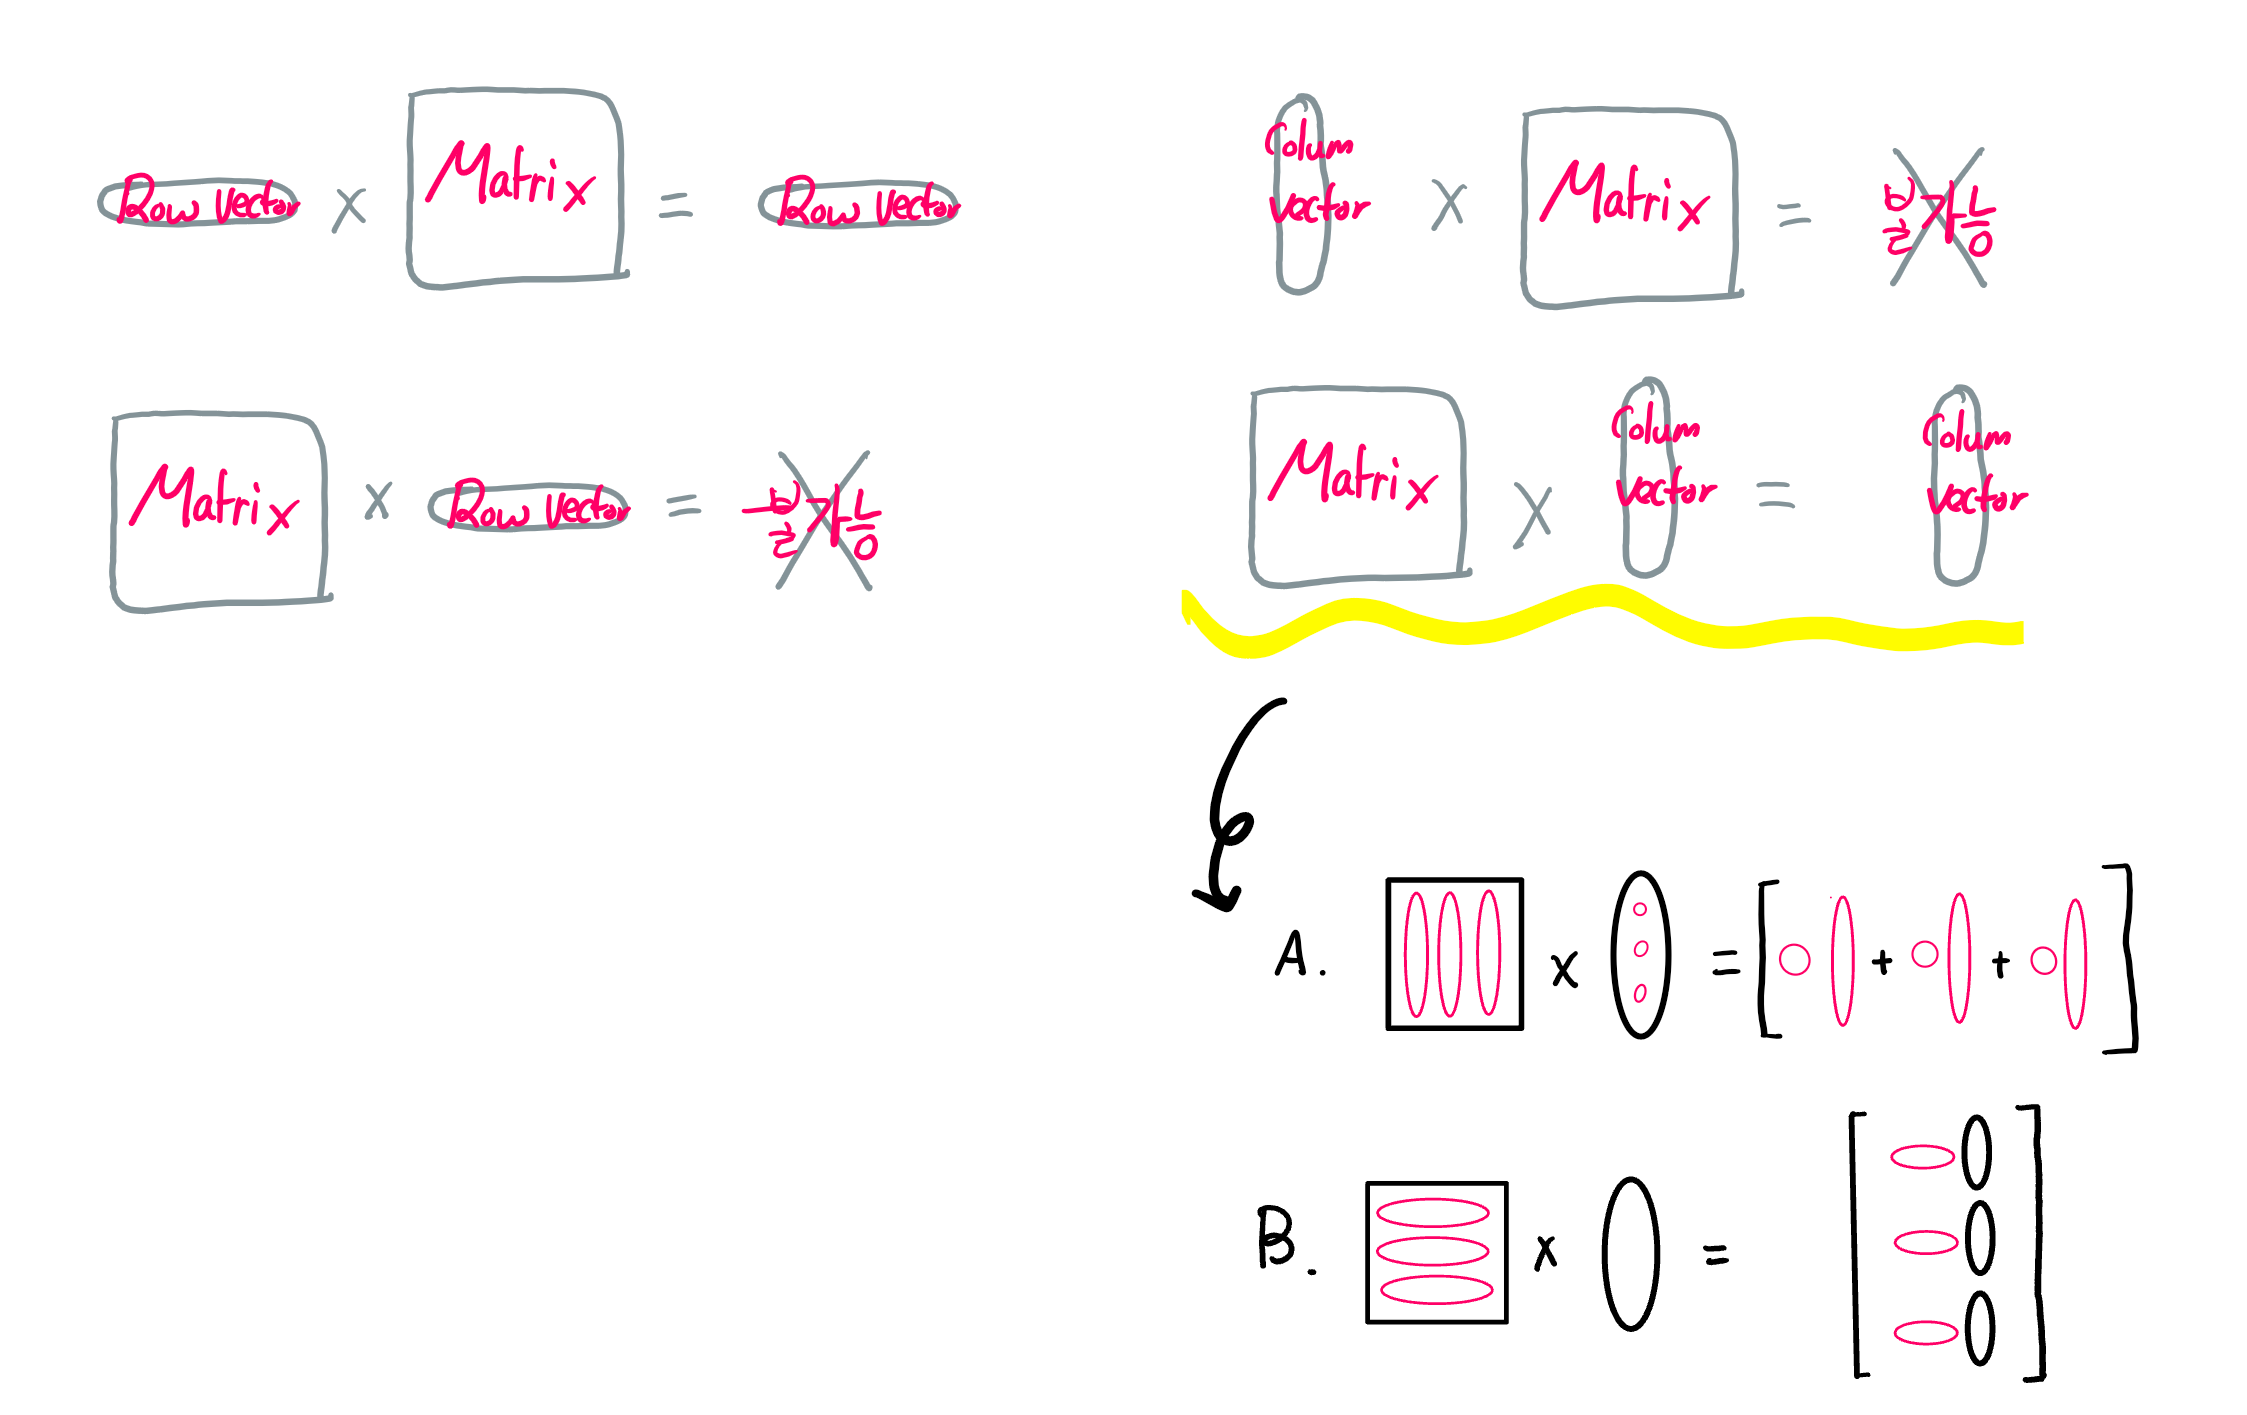

In [12]:
Image(filename='./images/3.png')

데이터 분석 시 행렬의 곱셈 중에서 가장 널리 사용되는 경우가 바로 다음과 같은 행렬 M과 벡터 v의 곱의 형태이다.


\begin{align}
Mv 
\tag{2.2.70}
\end{align}

\begin{align}
\boxed{\begin{matrix} 
\phantom{} & \phantom{} & \phantom{} & \phantom{} & \phantom{} \\ 
& & M & &\\ 
\phantom{} & \phantom{} & \phantom{} & \phantom{} & \phantom{} \\ 
\end{matrix}} \,
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ v \\ \phantom{\LARGE\mathstrut} \end{matrix}}
=
\boxed{\begin{matrix} 
\phantom{} \\ 
Mv \\ 
\phantom{}  
\end{matrix}}
\tag{2.2.71}
\end{align}

M * v 를 보는 2가지 관점이 존재한다.
- A. Matrix를 "Column"위주로 보는 관점 > 열 벡터의 선형조합
- B. Matrix를 "Row"위주로 보는 관점

**A. 열 벡터의 선형조합**

\begin{align}
Xw=
\begin{bmatrix}
c_1 & c_2 & \cdots & c_M
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_M
\end{bmatrix}
=
w_1 c_1 + w_2 c_2 + \cdots + w_M c_M
\tag{2.2.72}
\end{align}

\begin{align}
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_{1_{\phantom{1}}} \\ \phantom{\LARGE\mathstrut} \end{matrix}} &
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_{2_{\phantom{1}}} \\ \phantom{\LARGE\mathstrut} \end{matrix}} &
\cdots & 
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_M \\ \phantom{\LARGE\mathstrut} \end{matrix}} 
\end{bmatrix} 
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_M
\end{bmatrix}
=
\begin{matrix}
w_1\,\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_{1_{\phantom{1}}} \\ \phantom{\LARGE\mathstrut} \end{matrix}} & + &
w_2\,\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_{2_{\phantom{1}}} \\ \phantom{\LARGE\mathstrut} \end{matrix}}& + & 
\cdots \!\!\!\!& + & 
w_M\,\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_M \\ \phantom{\LARGE\mathstrut} \end{matrix}}
\end{matrix}
\tag{2.2.73}
\end{align}

열 벡터마다 다른 가중치를 더하는 형태 > 다음과 같은 케이스에 활용한다.
- 서로 다른 image data (vector data)를 morphing (가중치) 할 때,
- 여러 개 vector 에 대한 가중합을 동시에 계산해야 할 때 > 여러 vector를 하나의 matrix로 놓고 한번에 계산 가능
  

**B.행 기준으로 보았을 때**


case1: residual 구하기
- linear regression medel의 결과는 가중치 w vector의 형태로 나타난다.. 
- 예측치($\hat{y}$)는 이 가중치 벡터와 독립변수 x vector의 가중합으로 나타난다.
- 예측치와 실제값 ($y_i$)의 차이를 오차(error) 혹은 잔차(residual) 이라고 한다.

\begin{align}
e_i = y_i - \hat{y}_i  = y_i - w^Tx_i 
\tag{2.2.80}
\end{align}

\begin{align}
\begin{aligned}
e 
&=
\begin{bmatrix}
e_{1} \\
e_{2} \\
\vdots \\
e_{M} \\
\end{bmatrix}
\\ 
&=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{M} \\
\end{bmatrix}
-
\begin{bmatrix}
x^T_{1}w \\
x^T_{2}w \\
\vdots \\
x^T_{M}w \\
\end{bmatrix}
\\ 
&= y - Xw
\end{aligned}
\tag{2.2.81}
\end{align}

\begin{align}
e = y - Xw
\tag{2.2.82}
\end{align}


> 잔차 제곱합
- residual 이 작으면 작을 수록 좋은 모델, 크다면 좋지 않은 모델
- 각 모델 간 비교할 때, residual의 크기를 토대로 비교하곤 함
- 그러나 residual의 단순합은 항상 0이기 때문에, 다음과 같이 제곱합으로 비교한다.

\begin{align}
\sum_{i=1}^{N} e_i^2 = \sum_{i=1}^{N} (y_i - w^Tx_i)^2 = e^Te =  (y - Xw)^T (y - Xw) 
\tag{2.2.83}
\end{align}

\begin{align}
(y - Xw)^T (y - Xw) = y^Ty - w^TX^Ty - y^TXw + w^TX^TXw  
\tag{2.2.84}
\end{align}

> 이차형식
- `2.2.84` 공식의 마지막 항은 $ w^TX^TXw  $ 인 형태다.
- $X^TX$는 정방행렬이 되므로 임의의 정방행렬을 $A$라고 한다면, 이는 $w^TAw$ 의 형태가 된다.
- 이렇게 **행 벡터 * 정방행렬 * 열 벡터**의 형식으로 되어 있는 것을 **벡터의 이차형식(Quadratic Form)**이라고 한다.

\begin{align}
\begin{aligned}
x^T A x 
&= 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,N} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N,1} & a_{N,2} & \cdots & a_{N,N} \\
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} 
\\
&= \sum_{i=1}^{N} \sum_{j=1}^{N} a_{i,j} x_i x_j 
\end{aligned}
\tag{2.2.85}
\end{align}

- loop가 중첩된 형태 > nested loop(중첩반복문)


### 나눗셈
- 역행렬의 개념 도입